<a href="https://colab.research.google.com/github/teticio/audio-diffusion/blob/master/notebooks/test_mel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
try:
    # are we running on Google Colab?
    import google.colab
    !git clone -q https://github.com/teticio/audio-diffusion.git
    %cd audio-diffusion
    %pip install -q -r requirements.txt
except:
    pass

### Transform slice of audio to mel spectrogram

In [37]:
try:
    # are we running on Google Colab?
    from google.colab import files
    audio_file = list(files.upload().keys())[0]
except:
    audio_file = "../cache/spotify_sleep_dataset/waveform_small/waveform/34860.wav"

In [ ]:
# These are the default parameters. If you change any of them, you may have to adjust the others.
mel = Mel(x_res=256,
          y_res=256,
          hop_length=256,
          sample_rate=22050,
          n_fft=1024,
          n_iter=32)

In [38]:
mel.load_audio(audio_file)

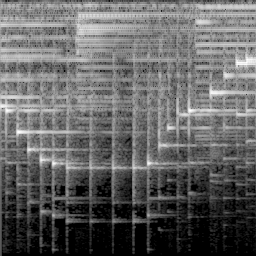

In [39]:
image = mel.audio_slice_to_image(3)
image

In [40]:
image.width, image.height

(256, 256)

### Transform mel spectrogram back to audio

In [41]:
audio = mel.image_to_audio(image)
Audio(data=audio, rate=mel.get_sample_rate())

### Select a random image from the training set

In [42]:
ds = load_dataset('teticio/audio-diffusion-256')

Generating train split: 100%|██████████| 21571/21571 [00:08<00:00, 2411.75 examples/s]


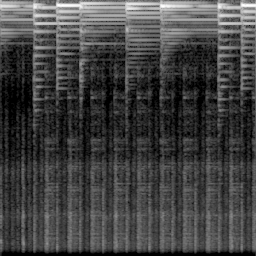

In [43]:
image = ds['train'].shuffle().select(range(1))['image'][0]
image

### Convert to audio

In [44]:
audio = mel.image_to_audio(image)
Audio(data=audio, rate=mel.get_sample_rate())